# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Imports

In [1]:
from IPython import get_ipython
get_ipython().magic('reset -sf')

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Conv1D, Conv3D, MaxPool2D, Flatten, Dropout
import keras.backend as K
from keras import optimizers
from keras import initializers
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
from keras.models import model_from_json
from sklearn.metrics import classification_report, confusion_matrix
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.callbacks import LearningRateScheduler
from sklearn.metrics import confusion_matrix
from keras import metrics
from keras.layers import BatchNormalization
from sklearn.utils import shuffle
from matplotlib import colors
from ipywidgets import widgets
import traitlets
from IPython.display import display
import matplotlib.gridspec as gridspec
from skimage.transform import warp, warp_coords
from scipy.ndimage.interpolation import map_coordinates
from skimage.transform import ProjectiveTransform
from skimage import color
from skimage import exposure, img_as_float
import random
import collections
import os.path
import pickle
import pandas as pd
import numpy as np
import math
import os

Using TensorFlow backend.


## Load the data

In [2]:
# Load pickled data

# TODO: Fill this in based on where you saved the training and testing data

training_file = "./source/train.p"
validation_file= "./source/valid.p"
testing_file = "./source/test.p"

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

signnames = pd.read_csv("./source/signnames.csv")

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [3]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = len (X_train)

# TODO: Number of validation examples
n_validation = len (X_valid)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# TODO: How many unique classes/labels there are in the dataset.
n_classes = len(np.unique(y_train))


n_valid = len(X_valid)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_valid)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43



### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

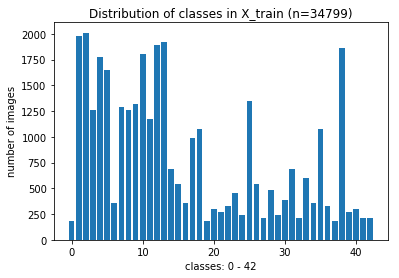

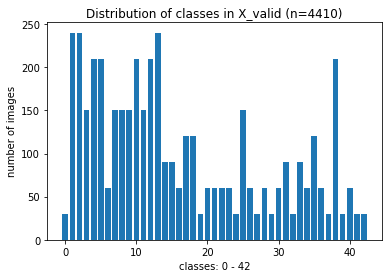

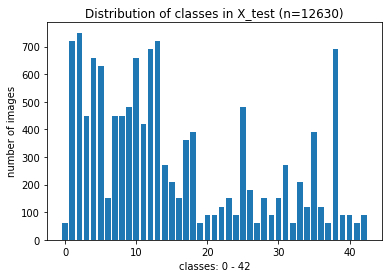

In [4]:
### Data exploration visualization code goes here.
### Feel free to use as many code cells as needed.
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

def plot_histograms(n_classes):
    """Ploting distributions of each set"""
    def count_labels(y, n_cls=n_classes):
        temp = y.tolist()
        labels_count = np.zeros(n_classes)
        for item in range(n_classes): 
            labels_count[item] = temp.count(item)
        return labels_count
    
    x_axis = list(np.linspace(0, n_classes-1, num=n_classes))
    plt.figure(num=1)
    n_tr_lbls = count_labels(y_train)
    plt.bar(x_axis, n_tr_lbls)
    plt.title('Distribution of classes in X_train (n=%d)'%len(X_train))
    plt.xlabel('classes: 0 - %d'%(n_classes - 1))
    plt.ylabel('number of images')

    plt.figure(num=2)
    n_vl_lbls = count_labels(y_valid)
    plt.bar(x_axis, n_vl_lbls)
    plt.title('Distribution of classes in X_valid (n=%d)'%len(X_valid))
    plt.xlabel('classes: 0 - %d'%(n_classes - 1))
    plt.ylabel('number of images')
    
    plt.figure(num=3)
    n_tt_lbls = count_labels(y_test)
    plt.bar(x_axis, n_tt_lbls)    
    plt.title('Distribution of classes in X_test (n=%d)'%len(X_test))
    plt.xlabel('classes: 0 - %d'%(n_classes - 1))
    plt.ylabel('number of images')

plot_histograms(n_classes)

### Data visualization

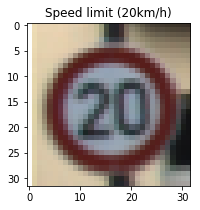

In [5]:
x_train_grped = {}
for label in np.unique(y_train).tolist():
    x_train_grped[label] = []
for index in range (n_train):
    x_train_grped[y_train[index]].append(index)

label_slider = widgets.IntSlider(max=n_classes, description="Label")
label_slider.max = n_classes - 1
index_slider = widgets.IntSlider(description="Image index")
description = widgets.Text(disabled=True)
    
def on_label_value_changed(change):
    index_slider.max = len(x_train_grped[label_slider.value]) - 1
index_slider.observe(on_label_value_changed, names='value')

img_index = 0
dummy_res = None
def display_images(index, label):
    global img_index, dummy_res
    index_slider.max = len(x_train_grped[label_slider.value]) - 1
    plt.figure(figsize=(3, 3))
    data = x_train_grped[label_slider.value]
    img_index = data[index_slider.value] 
    #description.value = "Image data at X_train [%d]"%img_index
    
    plt.imshow(X_train[img_index])
    plt.title(signnames['SignName'][label_slider.value])


caption = widgets.Label(value='Please select a label and a corresponding index \
                                        in the container of grouped training data')

## Caution: displaying the data after shuffling the training data 
## will result in wrong images and label correspondance

display(caption)
# redirect output to variable and kwargs __output_result to avoid the verbose printing
my_widget = widgets.interact(display_images, label=label_slider, index=index_slider, \
                             __output_result=False)
#my_widget = widgets.interact(display_images, label=label_slider, index=index_slider, \
#                             desc=description, __output_result=False)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [6]:
rotation_range = np.linspace(.15, .22, num=10, dtype=float)
translation_range = np.linspace(-5., 5., num=10, dtype=float)
scaling_range = np.linspace(.9, 1.5, num=15, dtype=float)
rotation_range = rotation_range.tolist()
translation_range = translation_range.tolist()
scaling_range = scaling_range.tolist()
AUG_TRAIN_FILE = "./source/train_a.p" 
X_train_a = None
y_train_a = None

def rnd_transform(orig_img, transform):
    result = None
    t_matrix = None
    img = np.copy(orig_img)
    
    if transform == "rotation":
        index = random.randint(0, len(rotation_range)-1)
        angle = rotation_range[index]
        
## Matrix represented as [ [x_scale,  x_skew,  t_x]
##                         [y_scale,  y_skew,  t_y]
##                         [x_position, y_position, 1]]
##                
        sin_val = np.array([np.sin(angle), -np.sin(angle)])
        random.shuffle(sin_val)
        
        t_matrix = np.array([[np.cos(angle), sin_val[0], 0],\
                             [sin_val[1], np.cos(angle), 0],\
                             [0, 0, 1]])
    elif transform == "translation":
        x_index = random.randint(0, len(translation_range)-1)
        x_tr = translation_range[x_index]
        y_index = random.randint(0, len(translation_range)-1)        
        y_tr = translation_range[y_index]
        #print(x_tr, y_tr)
        t_matrix = np.array([[1, 0, x_tr],\
                             [0, 1, -y_tr],\
                             [0, 0, 1]])
    elif transform == "scaling":
        x_index = random.randint(0, len(scaling_range)-1)
        x_sc = scaling_range[x_index]
        #print (x_sc)
        y_index = random.randint(0, len(scaling_range)-1)        
        y_sc = scaling_range[y_index]
        #print(y_sc)
        t_matrix = np.array([[x_sc, 0, 0],\
                              [0, y_sc, 0],\
                              [0, 0, 1]])
    else:
        pass
    if t_matrix is not None:
        t_trans = ProjectiveTransform(matrix=t_matrix)
        img = warp(img, t_trans, mode='edge', clip=True,\
                   order=1, output_shape=(img.shape[0], img.shape[1]))  
    return img


def rescale_intensity(img):
    p2, p98 = np.percentile(img, (2, 98))
    img_ = exposure.rescale_intensity(img, in_range=(p2, p98))
    return img_


def augment_data(threshold=750, save_as=True):
    #find classes with less than "threshold" amount of data
    tr_counter=collections.Counter(y_train.tolist())
    tr_counter = collections.OrderedDict(tr_counter)
    threshold = 750
    below_treshold_cls = [key for key in list(tr_counter.keys())\
                                      if tr_counter[key] < threshold]
    trf_op = ['rotation', 'translation', 'scaling']
    
    X_train_a = np.copy(X_train)
    y_train_a = np.copy(y_train)
    print (len(X_train_a))
    print (len(y_train_a))
    for cls in below_treshold_cls:
        print ("Processing label %d ..."%cls)
        cls_indexes = np.where(y_train==cls)[0]
        cls_indexes = cls_indexes.tolist()
        for index in cls_indexes:
            tmp_orig = np.copy(X_train[index])
            for op in trf_op:
                tmp = rnd_transform(tmp_orig, transform=op)
                # update X_train and y_train
                X_train_a = np.append(X_train_a, np.array([tmp]), axis=0)
                y_train_a = np.append(y_train_a, cls)
    # Save data into new file
    outfile = open(AUG_TRAIN_FILE, 'wb')
    train_aug = {'features': X_train_a, 'labels': y_train_a}
    pickle.dump(train_aug, outfile)
    outfile.close()
    
    # Rename new data
    X_train = X_train_a
    y_train = y_train_a
    print("Data augmentation finished.")




### Data Augmentation & Pre-processing

#### Fake data generation (Caution: takes a long time!)

No data augmentation applied!


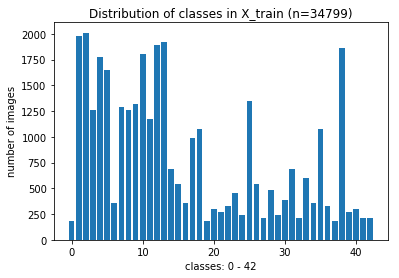

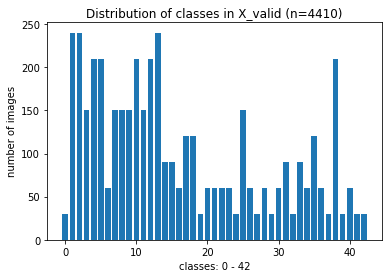

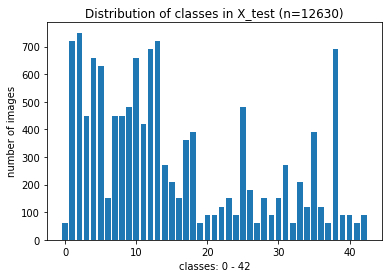

In [7]:
AUGMENT_DATA = False
# Load or generate fake data
if os.path.isfile(AUG_TRAIN_FILE) and\
            os.access(AUG_TRAIN_FILE, os.R_OK) and AUGMENT_DATA:
    with open(AUG_TRAIN_FILE, mode='rb') as f:
        train_a = pickle.load(f)
        X_train_a, y_train_a = train_a['features'], train_a['labels']
        X_train = X_train_a
        y_train = y_train_a
        X_train, y_train = shuffle(X_train, y_train)
elif AUGMENT_DATA:
    augment_data()
    X_train, y_train = shuffle(X_train, y_train)
else:
    print("No data augmentation applied!")

# Histograms
plot_histograms(n_classes)


#### Normalization, grayscale

In [8]:
### Preprocess the data here. It is required to normalize the data. Other preprocessing steps could include 
### converting to grayscale, etc.
### Feel free to use as many code cells as needed.
GRAY_MODE = False
if GRAY_MODE:
    X_train = np.dot(X_train[...,:3], [0.299, 0.587, 0.114])        
    X_valid = np.dot(X_valid[...,:3], [0.299, 0.587, 0.114])
    # add last channel
    X_train = X_train.reshape(X_train.shape + (1,))
    X_valid = X_valid.reshape(X_valid.shape + (1,))

    
## Scale features
X_train = X_train.astype(np.float32)/255.0
X_valid = X_valid.astype(np.float32)/255.0
X_test  = X_test.astype(np.float32)/255.0

X_train, y_train = shuffle(X_train, y_train)

# Rescale intensity of training examples
#map(rescale_intensity, X_train)

# Rescale intensity of validation examples
#map(rescale_intensity, X_valid)

# Rescale intensity of test examples
#map(rescale_intensity, X_test)





### Model Architecture

#### Using Keras with TensorFlow backend

In [9]:
#Converts a class vector (integers) to binary class matrix.
#E.g. for use with categorical_crossentropy.
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train, n_classes)
y_valid_cat = to_categorical(y_valid, n_classes)
y_test_cat  = to_categorical(y_test, n_classes)


BATCH_SIZE_KE = 64
EPOCHS_KE = 30 #150
SKIP_TRAINING = False
learning_rate_ke = 0.01


def save_model(model):
    # serialize model to JSON
    model_json = model.to_json()
    with open("./cnnet/model.json", "w") as json_file:
        json_file.write(model_json)
        
    print("Model saved.")

# learning rate schedule
    #http://machinelearningmastery.com/
    #using-learning-rate-schedules-deep-learning-models-python-keras/
def step2_decay(epoch):
    initial_lrate = 0.1
    drop = 0.5
    epochs_drop = 10.0
    lrate = initial_lrate * math.pow(drop, math.floor((1+epoch)/epochs_drop))
    return lrate

def step_decay(epoch):
    drop = 0.1
    epochs_drop = 10
    return learning_rate_ke*math.pow(drop, math.floor(epoch/epochs_drop))
    
def myNet():
    K.clear_session()
    model = Sequential()
    mu = 0
    sigma = 0.1
    
    # L1: Conv2D
    model.add(Conv2D(32, (3, 3), activation='relu',
                    input_shape=(32, 32, X_train.shape[3]), padding='valid',
                    #kernel_initializer=initializers.TruncatedNormal(stddev=sigma),
                    use_bias=True,
                    bias_initializer=initializers.Zeros(),
                    name='conv2d_1'))

    # L3: Conv2D   
    model.add(Conv2D(32, (3, 3), activation='relu', padding='valid',
                    #kernel_initializer=initializers.TruncatedNormal(stddev=sigma),
                    use_bias=True,
                    bias_initializer=initializers.Zeros(),
                    name='conv2d_2'))

    model.add(BatchNormalization(name='bn_1'))
    # L4: MaxPool2D
    model.add(MaxPool2D(pool_size=(2, 2), name='maxpool2d_1'))
    model.add(Dropout(0.2, name="dp_1"))
    
    # L6: Conv3D
    model.add(Conv2D(64, (3, 3), activation='relu', padding='valid',
                    #kernel_initializer=initializers.TruncatedNormal(stddev=sigma),
                    use_bias=True,
                    bias_initializer=initializers.Zeros(),
                    name='conv2d_3'))
    # L7: Conv2D
    model.add(Conv2D(64, (3, 3), activation='relu', padding='valid',
                     #kernel_initializer=initializers.TruncatedNormal(stddev=sigma),
                     use_bias=True,
                     bias_initializer=initializers.Zeros(),
                     name='conv2d_4'))
    # L8
    model.add(BatchNormalization(name='bn_2'))
    model.add(MaxPool2D(pool_size=(2, 2), name='maxpool2d_2'))
    model.add(Dropout(0.2, name="dp_2"))
    
    
    # L12 Fully Connected
    model.add(Dense(128, activation='relu',
                    #kernel_initializer=initializers.TruncatedNormal(stddev=sigma),
                    use_bias=True,
                    bias_initializer=initializers.Zeros(),
                    name='fc_1'))
    # 
    model.add(Dense(128, activation='relu',
                    #kernel_initializer=initializers.TruncatedNormal(stddev=sigma),
                    use_bias=True,
                    bias_initializer=initializers.Zeros(),
                    name='fc_2'))
    #
    model.add(BatchNormalization(name='bn_3'))
    model.add(MaxPool2D(pool_size=(2, 2), name='maxpool2d_3'))
    model.add(Dropout(0.2, name="dp_3"))

    model.add(Flatten(name='fln_1'))
    model.add(Dense(512, activation='relu',
                    #kernel_initializer=initializers.TruncatedNormal(stddev=sigma),
                    use_bias=True,
                    bias_initializer=initializers.Zeros(),
                    name='fc_3'))
    model.add(Dropout(0.5, name='dp_4'))
    
    #L14 Fully Connected
    model.add(Dense(n_classes,
                    #kernel_initializer=initializers.TruncatedNormal(stddev=sigma),
                    use_bias=True, 
                    bias_initializer=initializers.Zeros(),
                    activation='softmax',
                    name='fc_4'))
    return model 
    


#### Train Model

In [10]:
if not SKIP_TRAINING:
    model = myNet()

    # for SGD optimizer
    lrate = LearningRateScheduler(step_decay)
    sgd_op = optimizers.SGD(lr=learning_rate_ke, momentum=0.9, nesterov=True)

    # Adam optimizer
    adam_op = optimizers.Adam(lr=learning_rate_ke, beta_1=0.9,
                              beta_2=0.999, epsilon=1e-08, decay=0.0)

    #
    model.compile(loss='categorical_crossentropy',
                  optimizer=sgd_op,
                  metrics=['accuracy'])

    ## Model Summary
    model.summary()

    ## Save the model
    save_model(model)

    ## Checkpoint
    filepath="./weights/w-improvement-{epoch:02d}-{val_acc:.2f}.hdf5"
    checkpointer = ModelCheckpoint(filepath, monitor='val_acc', verbose=1,\
                                    save_best_only=True)

    # Callback list
    callbacks_list = [checkpointer, lrate]
    hist = None
    hist_file = "./cnnet/history.p"
    h_saved = False

    try:
        hist = model.fit(X_train, y_train_cat, batch_size=BATCH_SIZE_KE,\
                      validation_data=(X_valid, y_valid_cat),\
                      epochs=EPOCHS_KE, verbose=1, shuffle=True,\
                      callbacks=callbacks_list)

    except KeyboardInterrupt:
        print("Training aborted by user")
        out_tr_file = open(hist_file, 'wb')
        hist_container = {'acc': hist.history['acc'], 'val_acc': hist.history['val_acc'],\
                      'loss': hist.history['loss'], 'val_loss': hist.history['val_loss']}
        pickle.dump(hist_container, out_tr_file)
        out_tr_file.close()
        h_saved = True
        print("Training history saved.")

    if not h_saved:
        ## Save history to file
        out_tr_file = open(hist_file, 'wb')
        hist_container = {'acc': hist.history['acc'], 'val_acc': hist.history['val_acc'],\
                      'loss': hist.history['loss'], 'val_loss': hist.history['val_loss']}
        pickle.dump(hist_container, out_tr_file)
        out_tr_file.close()
        print("Training history saved.")


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
bn_1 (BatchNormalization)    (None, 28, 28, 32)        128       
_________________________________________________________________
maxpool2d_1 (MaxPooling2D)   (None, 14, 14, 32)        0         
_________________________________________________________________
dp_1 (Dropout)               (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 10, 10, 64)        36928     
__________

34799/34799 [==============================] - 160s - loss: 0.0199 - acc: 0.9937 - val_loss: 0.0730 - val_acc: 0.9812
Epoch 20/30
34799/34799 [==============================] - 161s - loss: 0.0206 - acc: 0.9936 - val_loss: 0.0729 - val_acc: 0.9837
Epoch 21/30
34799/34799 [==============================] - 158s - loss: 0.0207 - acc: 0.9935 - val_loss: 0.0723 - val_acc: 0.9832
Epoch 22/30
34799/34799 [==============================] - 161s - loss: 0.0180 - acc: 0.9948 - val_loss: 0.0721 - val_acc: 0.9832
Epoch 23/30
34799/34799 [==============================] - 156s - loss: 0.0187 - acc: 0.9940 - val_loss: 0.0725 - val_acc: 0.9832
Epoch 24/30
34799/34799 [==============================] - 156s - loss: 0.0181 - acc: 0.9944 - val_loss: 0.0721 - val_acc: 0.9834
Epoch 25/30
34799/34799 [==============================] - 155s - loss: 0.0193 - acc: 0.9938 - val_loss: 0.0731 - val_acc: 0.9832
Epoch 26/30
34799/34799 [==============================] - 152s - loss: 0.0198 - acc: 0.9937 - val_los

#### Plot accuracy and losses

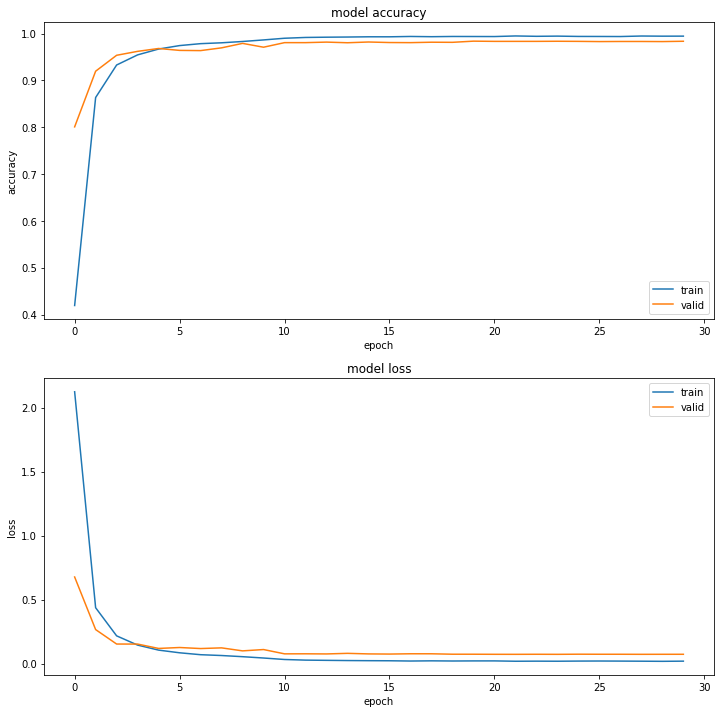

In [11]:
## Load history form drive
tr_hist = None
with open("./cnnet/history.p", mode='rb') as f:
    tr_hist = pickle.load(f)

plt.figure(num=3, figsize=(12, 12))     
# summarize history for accuracy  
plt.subplot(211)  
plt.plot(tr_hist['acc'])  

plt.plot(tr_hist['val_acc'])  
plt.title('model accuracy')  
plt.ylabel('accuracy')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid'], loc='lower right')  

# summarize history for loss  
plt.subplot(212)  
plt.plot(tr_hist['loss'])  
plt.plot(tr_hist['val_loss'])  
plt.title('model loss')  
plt.ylabel('loss')  
plt.xlabel('epoch')  
plt.legend(['train', 'valid'], loc='upper right')  
plt.show()  


#### Prediction on test samples and analysis (confusion matrix, classification report)

In [12]:
label_desc = ["%s - %2d"%(signnames['SignName'][label], label) for label in range(0, 43)]

# myNet instance
test_model = myNet()
# Load weights
test_model.load_weights("./weights/w-improvement-20-0.99.hdf5")
print("Weights loaded.")

# Get predictions
y_pred = test_model.predict_classes(X_test, verbose=1)
# Evaluate model
te_acc = np.sum(y_pred == y_test)/np.size(y_pred)
print('\nModel - Test accuracy: {}%\n'.format(te_acc*100))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=[label for label in range(0, 43)])

# Save confusion matrix
with open("./cnnet/confusion_matrix.csv", "wb") as f:
    np.savetxt(f, cm.astype(int), fmt='%i', delimiter=";")

    

Weights loaded.
12608/12630 [============================>.] - ETA: 0s
Model - Test accuracy: 96.84085510688836%



#### Plot confusion matrix

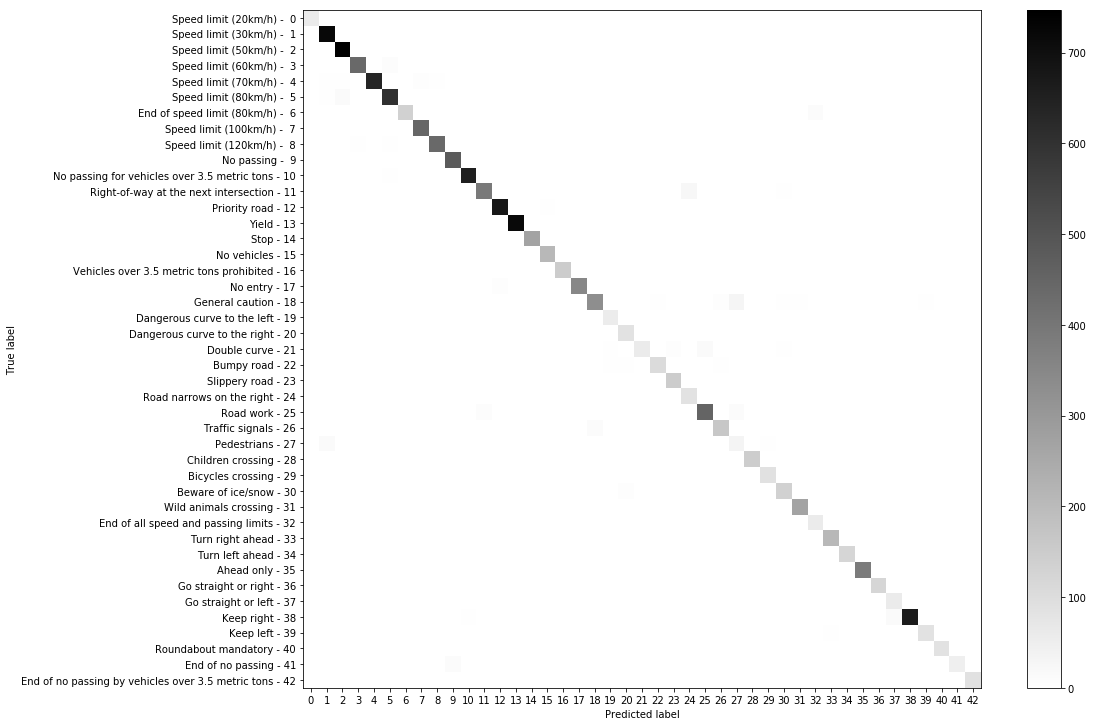

In [13]:
def plot_confusion_matrix(conf_mat, labels, n_classes=43):
    
    plt.figure(num=4, figsize=(13, 10))   
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.binary)
    plt.tight_layout()
    plt.colorbar()
    tick_marks = np.arange(n_classes)
    plt.xticks(tick_marks, range(n_classes))
    plt.yticks(tick_marks, tuple(labels))
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

plot_confusion_matrix(cm, label_desc)

#### Classification report

In [18]:
print (classification_report(y_test, y_pred, target_names=label_desc))

                                                         precision    recall  f1-score   support

                              Speed limit (20km/h) -  0       1.00      1.00      1.00        60
                              Speed limit (30km/h) -  1       0.95      1.00      0.98       720
                              Speed limit (50km/h) -  2       0.97      1.00      0.98       750
                              Speed limit (60km/h) -  3       0.99      0.97      0.98       450
                              Speed limit (70km/h) -  4       1.00      0.97      0.98       660
                              Speed limit (80km/h) -  5       0.96      0.96      0.96       630
                       End of speed limit (80km/h) -  6       1.00      0.90      0.95       150
                             Speed limit (100km/h) -  7       0.98      1.00      0.99       450
                             Speed limit (120km/h) -  8       0.99      0.98      0.98       450
                             

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

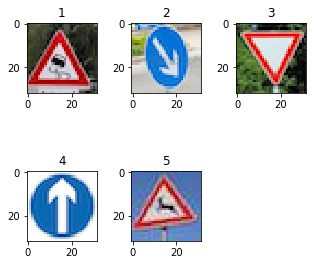

In [14]:
import scipy.ndimage as skimg

plt.figure(num=5, figsize=(5, 5))    
plt.subplots_adjust(hspace = .2, wspace = .5)
plt.subplot(231)
plt.title('1')
img = skimg.imread("./test_signs/1.png")
plt.imshow(img)

plt.subplot(232)
plt.title('2')
img = skimg.imread("./test_signs/2.png")
plt.imshow(img)


plt.subplot(233)
plt.title('3')
img = skimg.imread("./test_signs/3.png")
plt.imshow(img)

plt.subplot(234)
plt.title('4')
img = skimg.imread("./test_signs/4.png")
plt.imshow(img)

plt.subplot(235)
plt.title('5')
img = skimg.imread("./test_signs/5.png")
plt.imshow(img)


### Predict the Sign Type for Each Image

In [15]:
# Load and preprocess X_extra
# Load test image into X_extra
img_data = []
for f_index in range(1, 6):
    img_data.append(skimg.imread("./test_signs/%d.png"%f_index))
X_extra = np.array(img_data)

# Set label
y_extra = np.array([23, 38, 13, 35, 31])

# Preprocess X_extra
X_extra = X_extra.astype(np.float32)/255.0
#map(rescale_intensity, X_extra)

# Prediction
y_pred_extra = test_model.predict_classes(X_extra, verbose=1)

# Results
format_values = lambda x, y: print("|   {}   |     {}    |".format(x, y))
print("Predictions:")
print(22*'-')
print("| Target | Pediction |")
print(22*'-')
for index in range(len(y_extra)):
    format_values(y_extra[index], y_pred_extra[index])
print(22*'-')


5/5 [==============================] - 0s
Predictions:
----------------------
| Target | Pediction |
----------------------
|   23   |     23    |
|   38   |     38    |
|   13   |     13    |
|   35   |     35    |
|   31   |     31    |
----------------------


### Analyze Performance

In [16]:
_acc = y_pred_extra == y_extra
extra_acc = np.sum(_acc)/np.size(y_extra)
# Results
format_values = lambda x, y, z: print("|     {}     |       {}      |  {}  |".format(x, y, z))
print("Predictions:")
print(39*'-')
print("| Target (T) | Pediction (P) | T == P |")
print(39*'-')
for index in range(len(y_extra)):
    format_values(y_extra[index], y_pred_extra[index], _acc[index])
print(39*'-')
print('\nModel - Accuracy for downloaded signs: {}% \n'.format(extra_acc*100))

Predictions:
---------------------------------------
| Target (T) | Pediction (P) | T == P |
---------------------------------------
|     23     |       23      |  True  |
|     38     |       38      |  True  |
|     13     |       13      |  True  |
|     35     |       35      |  True  |
|     31     |       31      |  True  |
---------------------------------------

Model - Accuracy for downloaded signs: 100.0% 



### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [17]:
nb_of_largest_prob = 5
for index in range(len(X_extra)):
    # calculate the probabilities 
    print("{} Largest probabilities for value with Target: {} ".format(nb_of_largest_prob,
                                                                       y_extra[index]))
    print(55*'-')
    tmp_prob_extra = test_model.predict(np.array([X_extra[index]]), verbose=0)
    # sorted probabilities
    probs = tmp_prob_extra.argsort()[-nb_of_largest_prob:][::-1]
    # convert to simple list with 1 dimension
    probs = probs.tolist()[0]
    
    #sub_index [-nb_of_largest_prob, -1]
    for sub_index in range(-nb_of_largest_prob, 0, 1): 
        curr_label = probs[len(probs)+sub_index]
        print ("{} - {}".format(tmp_prob_extra[0][curr_label],
                                     signnames["SignName"][curr_label]))
    print(55*'-')
    print()
    

5 Largest probabilities for value with Target: 23 
-------------------------------------------------------
2.363632067847732e-10 - Right-of-way at the next intersection
3.5355518512858453e-10 - Bicycles crossing
3.2256792792395572e-09 - Beware of ice/snow
7.216234365614582e-08 - Dangerous curve to the right
0.9999998807907104 - Slippery road
-------------------------------------------------------

5 Largest probabilities for value with Target: 38 
-------------------------------------------------------
1.3878065211104683e-15 - Roundabout mandatory
2.254394706259792e-15 - Dangerous curve to the right
1.0014019913859654e-13 - Go straight or right
1.7196929102090974e-13 - Turn left ahead
1.0 - Keep right
-------------------------------------------------------

5 Largest probabilities for value with Target: 13 
-------------------------------------------------------
3.8533104549665036e-18 - Speed limit (50km/h)
8.929087976167975e-18 - Road work
8.230762085279886e-17 - Speed limit (30km/h)


### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.